In [2]:
import h5py
import numpy as np
from chunkflow.chunk import Chunk
from skimage.transform import resize
from skimage import color
from skimage import segmentation
import matplotlib.pyplot as plt
import time
import IPython

%load_ext autoreload
%autoreload 2
%matplotlib inline

def scale_data(vol, seg, size=180):
    length = vol.shape[0]
    vol = resize(vol, (length, size, size))
    seg = resize(seg, (length, size, size), order=0, preserve_range=True, anti_aliasing=False)

    return (vol, seg)
    
def label_data(vol, seg):
    length = vol.shape[0]
    size = vol.shape[1]
    # reshape for labeling
    seg = np.reshape(seg, (size, length*size) )
    vol = np.reshape(vol, (size, length*size) )
    # label
    labeled = color.label2rgb(seg, vol, alpha=0.2, bg_label=-1)
    # shape back
    labeled = np.reshape(labeled, (length, size, size, 3) )

    return labeled

def vis_volume(volume):
    length = volume.shape[0]
    
    # set up
    fig = plt.figure()
    axes = fig.add_subplot()
    hfig = display(fig, display_id=True)

    # display
    for i in range(length):
        axes.imshow(volume[i], interpolation='none', filternorm=False, resample=False)
        fig.canvas.draw()
        hfig.update(fig)
        if i != length-1:
            plt.cla()
    # clean up
    IPython.display.clear_output()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from dataset.segmentation import CremiDataset
from dataset.ground_truth_volume import *

patch_size = 64
dataset = CremiDataset(patch_size=patch_size)

read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None
read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None


(68, 68, 68)


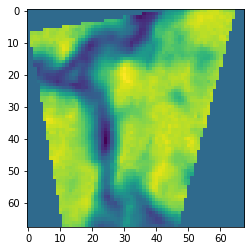

In [91]:
patch = dataset.random_training_patch
print(patch.shape)
i = 5

plt.imshow(patch.image[0][i])
plt.show()

(68, 68, 68)


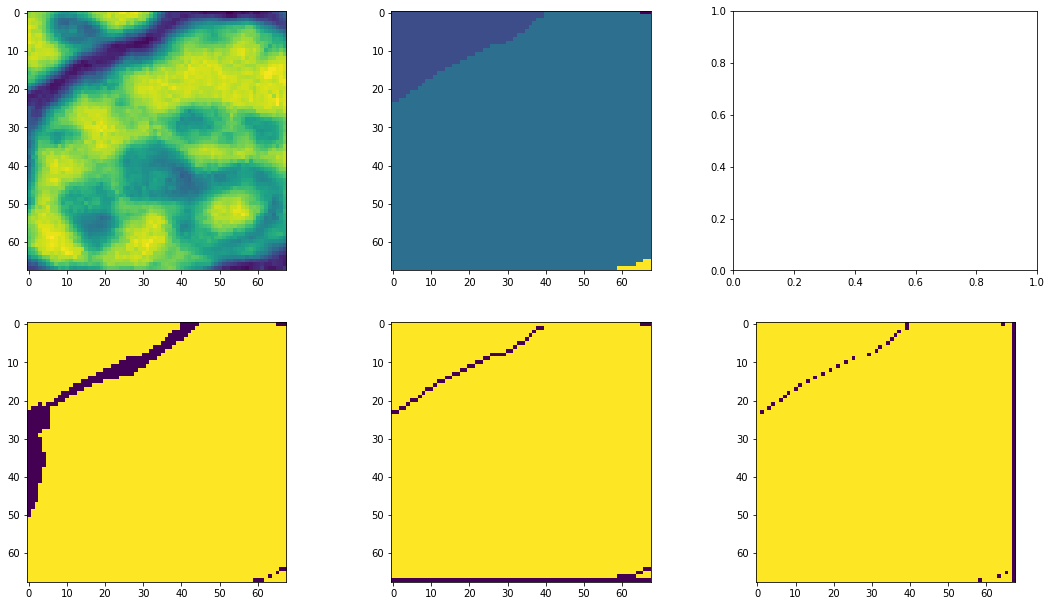

In [59]:
patch = dataset.random_training_patch
print(patch.shape)
i = 5

fig, axarr = plt.subplots(2,3)
fig.set_size_inches(18, 10)
axarr[0,0].imshow(patch.image[0][i])
axarr[0,1].imshow(patch.label[0][i])
axarr[1,0].imshow(patch.affinity[0][i])
axarr[1,1].imshow(patch.affinity[1][i])
axarr[1,2].imshow(patch.affinity[2][i])


In [56]:
import time

start = time.time()
for i in range(100):
    patch = dataset.random_training_patch
end = time.time()
print(end - start)


5.717328786849976


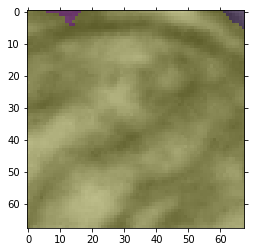

In [313]:
patch = dataset.random_training_patch
image = np.squeeze(patch.image)
label = np.squeeze(patch.label)
labeledPatch = label_data(image, label)
vis_volume(labeledPatch)